In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
file_path = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"
data = pd.read_csv(file_path)

In [98]:
data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [99]:
list_columns = data.columns.to_list
print(list_columns)

<bound method IndexOpsMixin.tolist of Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')>


In [100]:
dim = data.shape
dim

(303, 14)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [102]:
missing_data = data.isnull()
missing_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [103]:
# vérification qu'il n'y a pas de valeurs nulls

for colon in missing_data.columns.values.tolist():
    print(missing_data[colon].value_counts())
    print("")

age
False    303
Name: count, dtype: int64

sex
False    303
Name: count, dtype: int64

cp
False    303
Name: count, dtype: int64

trtbps
False    303
Name: count, dtype: int64

chol
False    303
Name: count, dtype: int64

fbs
False    303
Name: count, dtype: int64

restecg
False    303
Name: count, dtype: int64

thalachh
False    303
Name: count, dtype: int64

exng
False    303
Name: count, dtype: int64

oldpeak
False    303
Name: count, dtype: int64

slp
False    303
Name: count, dtype: int64

caa
False    303
Name: count, dtype: int64

thall
False    303
Name: count, dtype: int64

output
False    303
Name: count, dtype: int64



In [104]:
# visualisation les statistique de data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [105]:
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
countinous_features = list(set(data.columns) - set(discrete_features) - {'output'})
countinous_features

['trtbps', 'thalachh', 'chol', 'age', 'oldpeak']

<Axes: xlabel='sex', ylabel='age'>

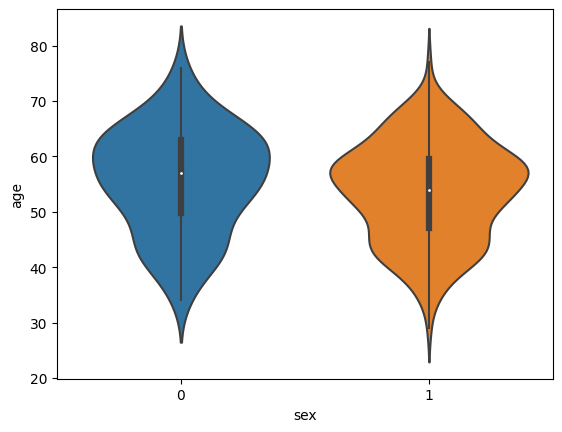

In [106]:
sns.violinplot(y = 'age', x='sex', data=data)

In [107]:
data['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [108]:
data['fbs'].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [109]:
data['restecg'].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [110]:
data['caa'].value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [111]:
data['thall'].value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [112]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='trtbps'>

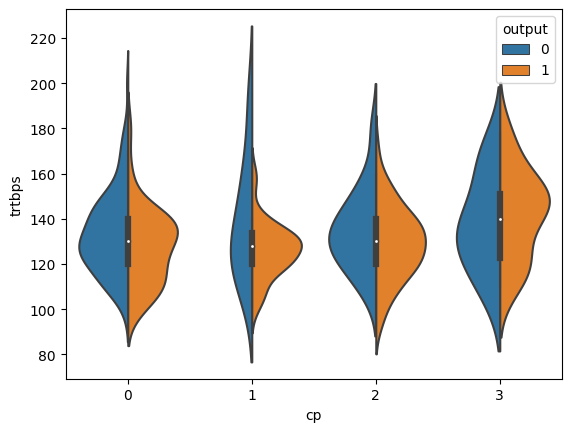

In [113]:
sns.violinplot(x = 'cp', y='trtbps', data=data, hue='output', split=True)

<Axes: xlabel='output', ylabel='chol'>

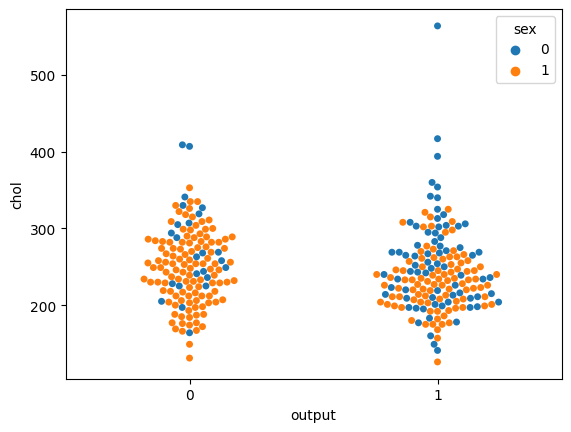

In [114]:
sns.swarmplot(x='output', y='chol', data=data, hue='sex')

In [115]:
data["trtbps"]

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trtbps, Length: 303, dtype: int64

<Axes: xlabel='output', ylabel='trtbps'>

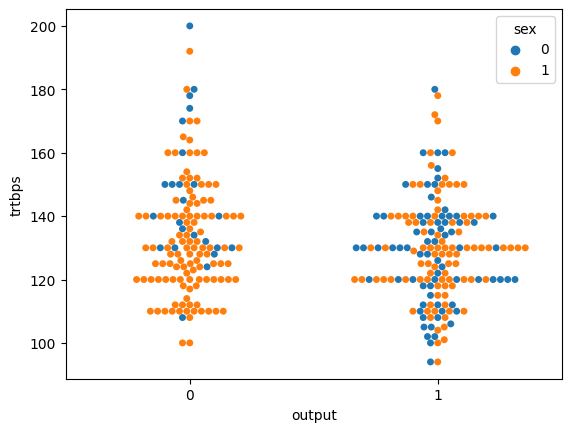

In [116]:
sns.swarmplot(x='output', y='trtbps', data=data, hue='sex')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


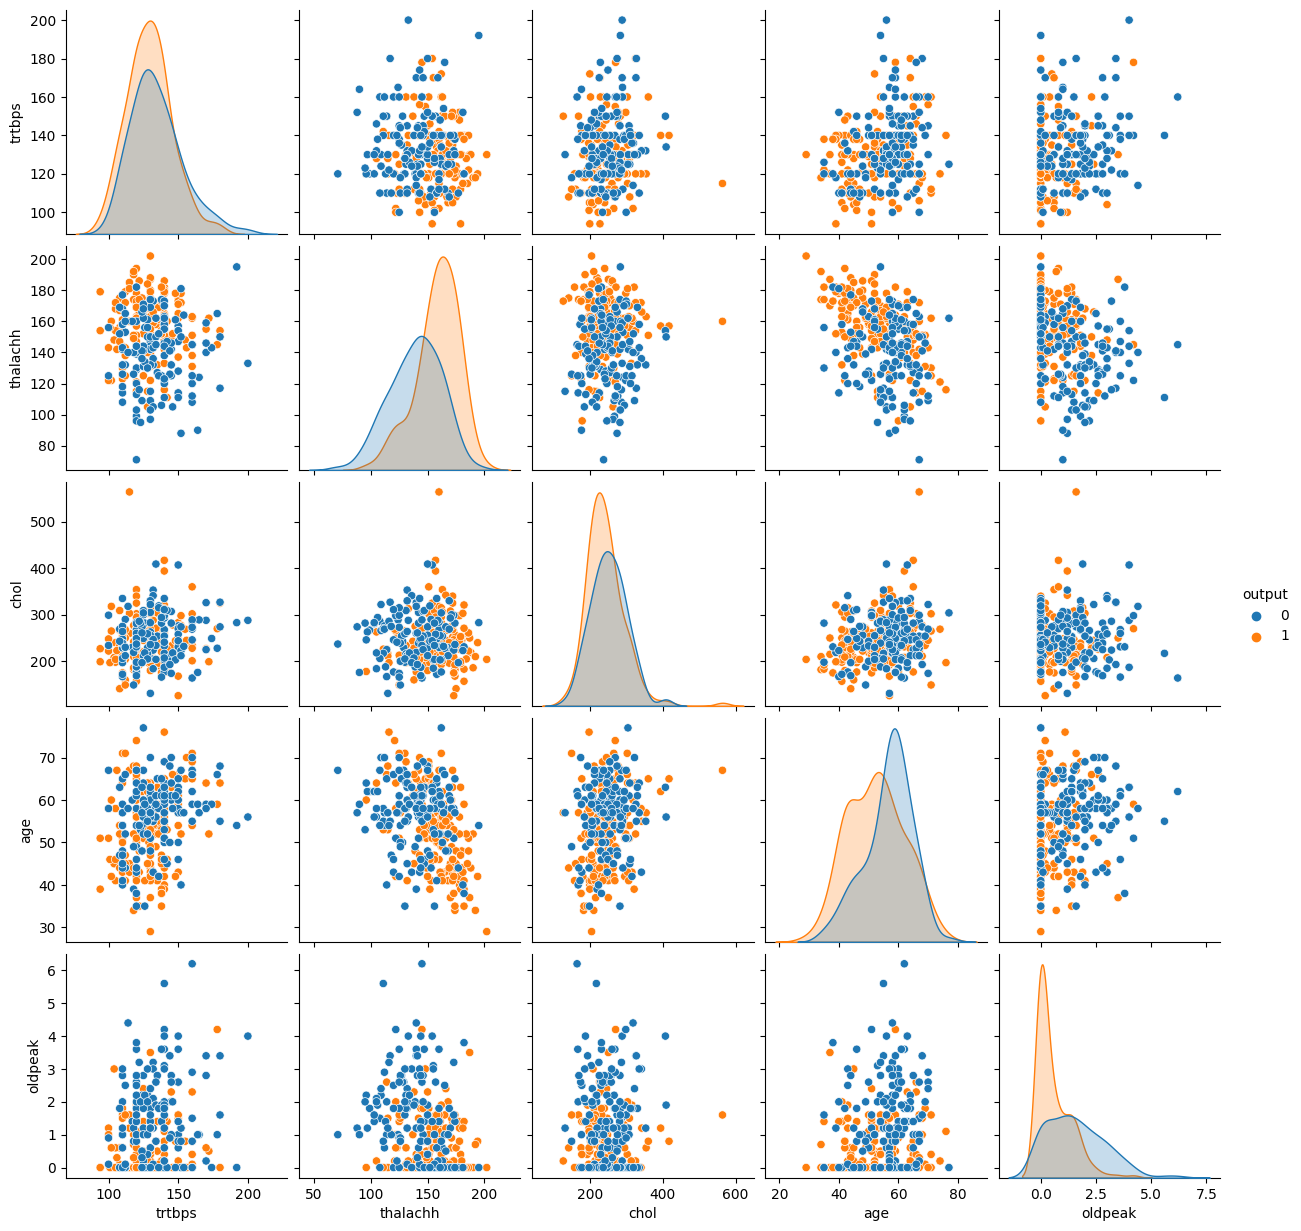

In [117]:
sns.pairplot(data=data[countinous_features+["output"]], hue='output')

<Axes: >

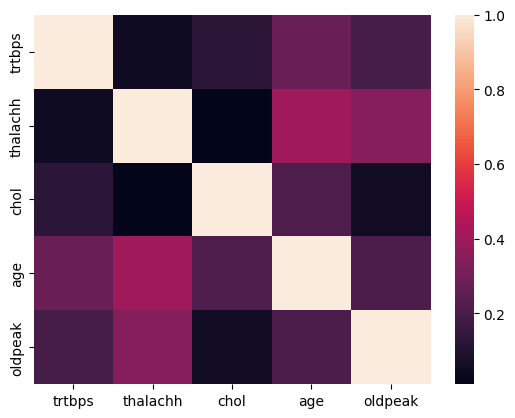

In [118]:
sns.heatmap(abs(data[countinous_features].corr()))

In [150]:
# preparation de data

Y = data["output"]
X = data.drop(["output"], axis=1)

In [156]:
# Machine learning : Séparation de données 

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [163]:
# Machine learning : arbre de décision

from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [165]:
yhat = model.predict(x_test)

In [166]:
# Evalution de model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [167]:
acc_score = accuracy_score(y_test, yhat)
acc_score

0.7377049180327869

In [169]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        22
           1       0.85      0.72      0.78        39

    accuracy                           0.74        61
   macro avg       0.73      0.75      0.73        61
weighted avg       0.76      0.74      0.74        61

